# **Introduction**

In this programming assignment, you will be practicing implementing divide-and-conquer solutions.

## Binary Search

Problem Description

**Task.** The goal in this code problem is to implement the binary search algorithm.

**Input Format.** The first line of the input contains an integer 𝑛 and a sequence 𝑎0 < 𝑎1 < . . . < 𝑎𝑛−1 of 𝑛 pairwise distinct positive integers in increasing order. The next line contains an integer 𝑘 and 𝑘 positive integers 𝑏0, 𝑏1, . . . , 𝑏𝑘−1.

**Constraints.** 1 ≤ 𝑘 ≤ $10^5$; 1 ≤ 𝑛 ≤ 3 · $10^4$; 1 ≤ 𝑎𝑖 ≤ $10^9$ for all 0 ≤ 𝑖 < 𝑛; 1 ≤ 𝑏𝑗 ≤ $10^9$ for all 0 ≤ 𝑗 < 𝑘;

**Output Format.** For all 𝑖 from 0 to 𝑘 − 1, output an index 0 ≤ 𝑗 ≤ 𝑛 − 1 such that 𝑎𝑗 = 𝑏𝑖 or −1 if there is no such index.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`5 1 5 8 12 13`

`5 8 1 23 1 11`

Output:

`2 0 -1 0 -1`

In this sample, we are given an increasing sequence 𝑎0 = 1, 𝑎1 = 5, 𝑎2 = 8, 𝑎3 = 12, 𝑎4 = 13 of length five and five keys to search: 8, 1, 23, 1, 11. We see that 𝑎2 = 8 and 𝑎0 = 1, but the keys 23 and 11 do not appear in the sequence 𝑎. For this reason, we output a sequence 2, 0,−1, 0,−1.

In [ ]:
# Direct Solution

# Python3

import sys
import time

seq = [int(i) for i in input().split()]
search_seq = [int(i) for i in input().split()]

start_time = time.time()
n = seq[0]
seq = seq[1:]

def fast_binary_search(seq, elt, r):
    l = 0
    while l<=r: 
        m = (l+r)//2
        if elt > seq[m]:
            l = m + 1
        elif elt < seq[m]:
            r = m - 1
        else:
            return m
    return -1

soln = list()
for i in search_seq[1:]:
    ans = fast_binary_search(seq, i, n-1)
    soln.append(ans)
print(' '.join([str(i) for i in soln]))
print("--- %s seconds ---" % (time.time() - start_time))

5 1 5 8 12 13
5 8 1 23 1 11
2 0 -1 0 -1
--- 0.0005540847778320312 seconds ---


## Majority Element

Problem Description

**Task.** The goal in this code problem is to check whether an input sequence contains a majority element.

**Input Format.** The first line contains an integer 𝑛, the next one contains a sequence of 𝑛 non-negative integers 𝑎0, 𝑎1, . . . , 𝑎𝑛−1.

**Constraints.** 1 ≤ 𝑛 ≤ $10^5$; 0 ≤ 𝑎𝑖 ≤ $10^9$ for all 0 ≤ 𝑖 < 𝑛.

**Output Format.** Output 1 if the sequence contains an element that appears strictly more than 𝑛/2 times, and 0 otherwise.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`5`

`2 3 9 2 2`

Output:

`1`

2 is the majority element.

In [ ]:
# Direct Solution

# Python3

import sys
import time

n = int(input())
seq = [int(i) for i in input().split()]


def functional_divide(seq, l, r):
    if l+1==r:
        return seq[l]
    elif l+2==r:
        return seq[l]
    m = (l+r)//2
    left = functional_divide(seq, l, m)
    right = functional_divide(seq, m, r)

    c1, c2 = 0, 0
    for i in seq[l:r]:
        if i == left:
            c1+=1
        elif i == right:
            c2+=1
    if c1>(r-l)//2 and left != -1:
        return left
    elif c2>(r-l)//2 and right != -1:
        return right
    else: 
        return -1

start_time = time.time()
print(int(functional_divide(seq, 0, n) != -1))
print("--- %s seconds ---" % (time.time() - start_time))

5
2 3 9 2 2
1
--- 0.0002579689025878906 seconds ---


## Improving Quick Sort

Problem Description

**Task.** To force the given implementation of the quick sort algorithm to efficiently process sequences with few unique elements, your goal is replace a 2-way partition with a 3-way partition. That is, your new partition procedure should partition the array into three parts: < 𝑥 part, = 𝑥 part, and > 𝑥 part.

**Input Format.** The first line of the input contains an integer 𝑛. The next line contains a sequence of 𝑛 integers 𝑎0, 𝑎1, . . . , 𝑎𝑛−1.

**Constraints.** 1 ≤ 𝑛 ≤ $10^5$; 1 ≤ 𝑎𝑖 ≤ $10^9$ for all 0 ≤ 𝑖 < 𝑛.

**Output Format.** Output this sequence sorted in non-decreasing order.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`5`

`2 3 9 2 2`

Output:

`2 2 2 3 9`


In [ ]:
# Direct Solution

# Python3

import sys
import random
import time

def quicksort3(arr, l, r):
    # print('Splitting:', arr[l:r])
    if l + 1 >= r:
        return

    # Pivot selection; Return a random integer N such that l <= N <= r
    m = random.randint(l, r-1)
    # temp = sorted([(0,arr[0]), ((l+r)//2,arr[(l+r)//2]), (-1,arr[-1])], key = lambda x: x[1])
    # m = temp[1][0]
    arr[l], arr[m] = arr[m], arr[l]

    # partition procedure
    m1, m2 = partition3(arr, l, r)

    quicksort3(arr, l, m1)
    quicksort3(arr, m2+1, r)

def partition3(arr, l, r):
    m2 = l
    for i in range(l+1, r):
        if arr[i] <= arr[l]:
            arr[m2+1], arr[i] = arr[i], arr[m2+1]
            m2 += 1

    arr[l], arr[m2] = arr[m2], arr[l]

    m1 = l
    for i in range(l, m2):
        if arr[i] < arr[m2]:
            arr[i], arr[m1] = arr[m1], arr[i]
            m1 += 1
    return m1, m2

def create_array(size):
    return [random.choice(list(range(10))) for _ in range(size)]

# n = int(input())
# seq = [int(i) for i in input().split()]
# for x in seq:
    # print(x, end=' ')

t1 = time.time()
seq = create_array(100000)
quicksort3(seq, 0, 100000)
t2 = time.time()
print('Time taken:', t2-t1)

Time taken: 0.2901473045349121


In [ ]:
# Direct Solution - C++ (Way Better)

%%writefile Quicksort.cpp

#include <cstdlib>
#include <iostream>
#include <utility>
#include <vector>

using std::swap;
using std::vector;

int partition2(vector<int> &a, int l, int r) {
	int x = a[l];
	int j = l;
	for (int i = l + 1; i <= r; i++) {
		if (a[i] <= x) {
			j++;
			swap(a[i], a[j]);
		}
	}
	swap(a[l], a[j]);
	return j;
}

std::pair<int, int> partition3(vector<int> &a, int l, int r) {
	int x = a[l];
	int j = l;
	int k = r;
	for (int i = l; i <= r; i++) {
		if (a[i] < x) {
			swap(a[i], a[j]);
			j++;
		}
	}
	for (int i = r; i >= l; i--) {
		if (a[i] > x) {
			swap(a[i], a[k]);
			k--;
		}
	}

	for (int i = j; i <= k; i++) { a[i] = x; }

	return std::make_pair(j, k);
}

void randomized_quick_sort(vector<int> &a, int l, int r) {
	if (l >= r) { return; }

	int k = l + rand() % (r - l + 1);
	swap(a[l], a[k]);
	auto m = partition3(a, l, r);

	randomized_quick_sort(a, l, m.first - 1);
	randomized_quick_sort(a, m.second + 1, r);
}

int main() {
	int n;
	std::cin >> n;
	vector<int> a(n);
	for (size_t i = 0; i < a.size(); ++i) { std::cin >> a[i]; }
	randomized_quick_sort(a, 0, a.size() - 1);
	for (size_t i = 0; i < a.size(); ++i) { std::cout << a[i] << ' '; }
}

Writing Quicksort.cpp


In [ ]:
%%shell 
g++ Quicksort.cpp -o output
./output

5
2 3 9 2 2
2 2 2 3 9 

## Number of Inversions

Problem Description

**Task.** The goal in this problem is to count the number of inversions of a given sequence.

**Input Format.** The first line contains an integer 𝑛, the next one contains a sequence of integers 𝑎0, 𝑎1, . . . , 𝑎𝑛−1.

**Constraints.** 1 ≤ 𝑛 ≤ $10^5$; 1 ≤ 𝑎𝑖 ≤ $10^9$ for all 0 ≤ 𝑖 < 𝑛.

**Output Format.** Output the number of inversions in the sequence.

$\underline{Sample \hspace{0.2cm} 1.}$

Input:

`5`

`2 3 9 2 2`

Output:

`2`

The two inversions here are (1, 3) (𝑎1 = 3 > 2 = 𝑎3) and (2, 3) (𝑎2 = 9 > 2 = 𝑎3).

In [ ]:
# Direct Solution

# Python3

def merge(left, right):
    i, j, inversion_counter = 0, 0, 0
    final = list()
    while i < len(left) and j< len(right):
        if left[i] <= right[j]:
            final.append(left[i])
            i += 1
        else:
            final.append(right[j])
            inversion_counter += len(left) - i
            j += 1

    final += left[i:]
    final += right[j:]
        
    return final, inversion_counter

def mergesort(arr):
    global tot_count
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2

    left = mergesort(arr[:mid])
    right = mergesort(arr[mid:])

    sorted_arr, temp = merge(left, right)
    tot_count += temp

    return sorted_arr

tot_count = 0
n = int(input())
seq = [int(i) for i in input().split()]
start_time = time.time()
mergesort(seq)
print(int(tot_count/2))
print("--- %s seconds ---" % (time.time() - start_time))

5
2 3 9 2 2
2
--- 0.000274658203125 seconds ---


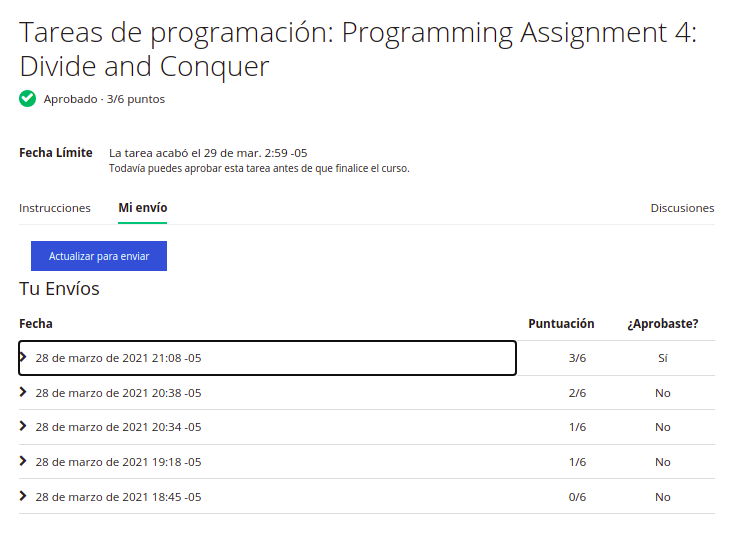